In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux import detgeo
from nuflux import data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mdb = data.get_particles("mutristan_small")

In [4]:
geom = "approximate_muon_detector_2"
particle = 'numu'

In [7]:
cc = detgeo.get_quantities(mdb)
_=cc.straight_segment_at_detector(8000)

In [13]:
sim = detgeo.SimulateDetector(cc, geom, particle).run()

4.13e+10 numu events


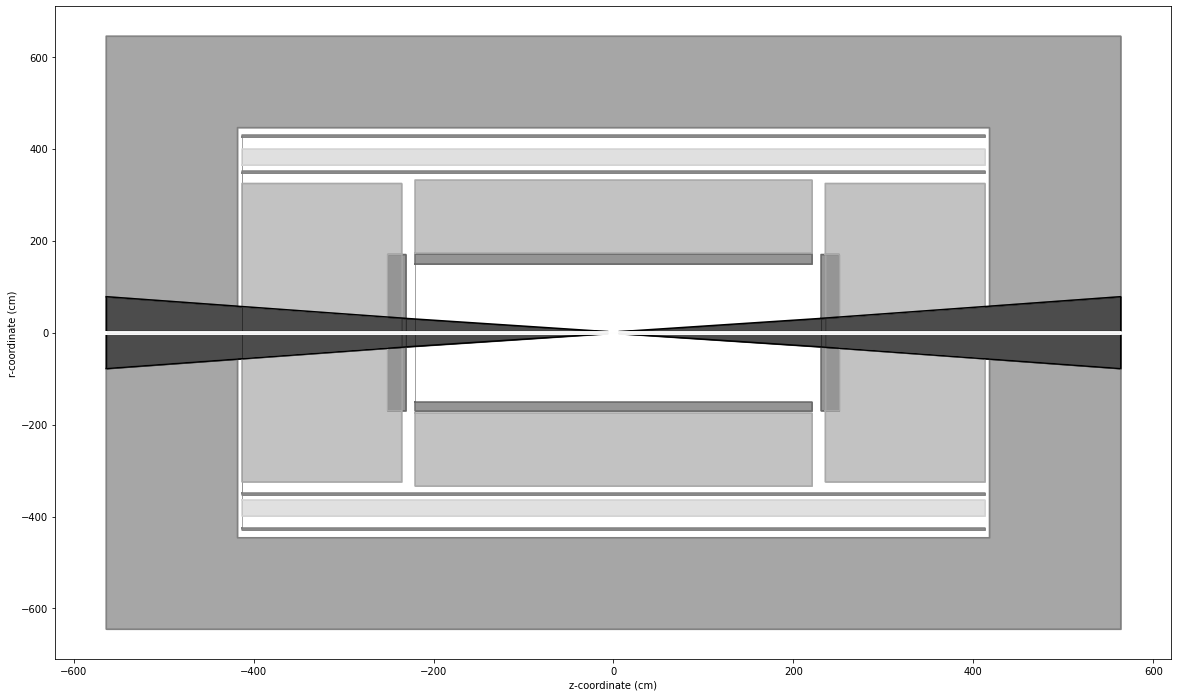

In [19]:
detgeo.plot_sim(geom)

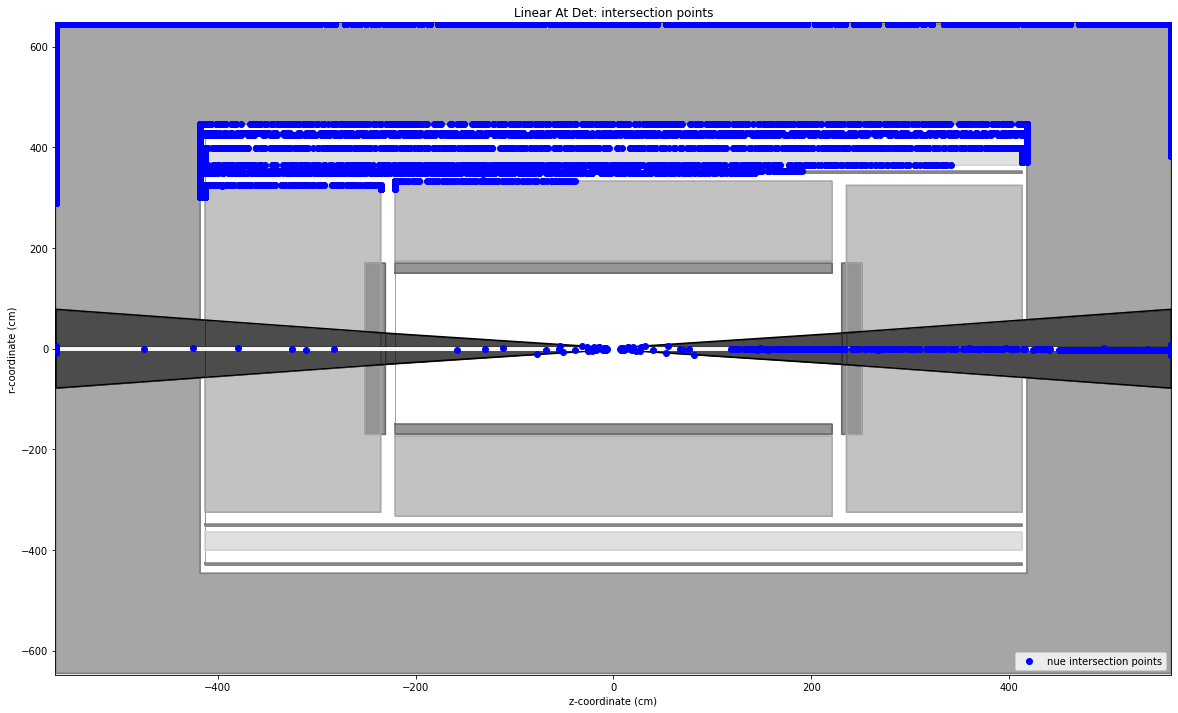

In [22]:
detgeo.plot_sim(geom)
arr = sim.intersection_points[sim.mask]
#arr2 = sim2.intersection_points[sim2.mask]
#plt.scatter(arr[particle, :,2], np.sqrt(arr[particle,:,1]**2 + arr[particle, :, 0]**2), alpha = 1, zorder = 10)
plt.scatter(arr[:, :,2], arr[:,:,1], alpha = 1, zorder = 10, c = 'blue', label ='nue intersection points')
#plt.scatter(arr2[:,:,2], arr2[:,:,1], alpha = 1, zorder = 10,c ='red', label = 'numu intersection points')
plt.xlim(-564, right=564)
plt.ylim(-648, 648)
plt.legend(loc ='lower right')
plt.title("Linear At Det: intersection points")
plt.savefig("plots_Luc/det_2/linear_at_det_intersection_points.jpg", bbox_inches='tight', dpi=300)

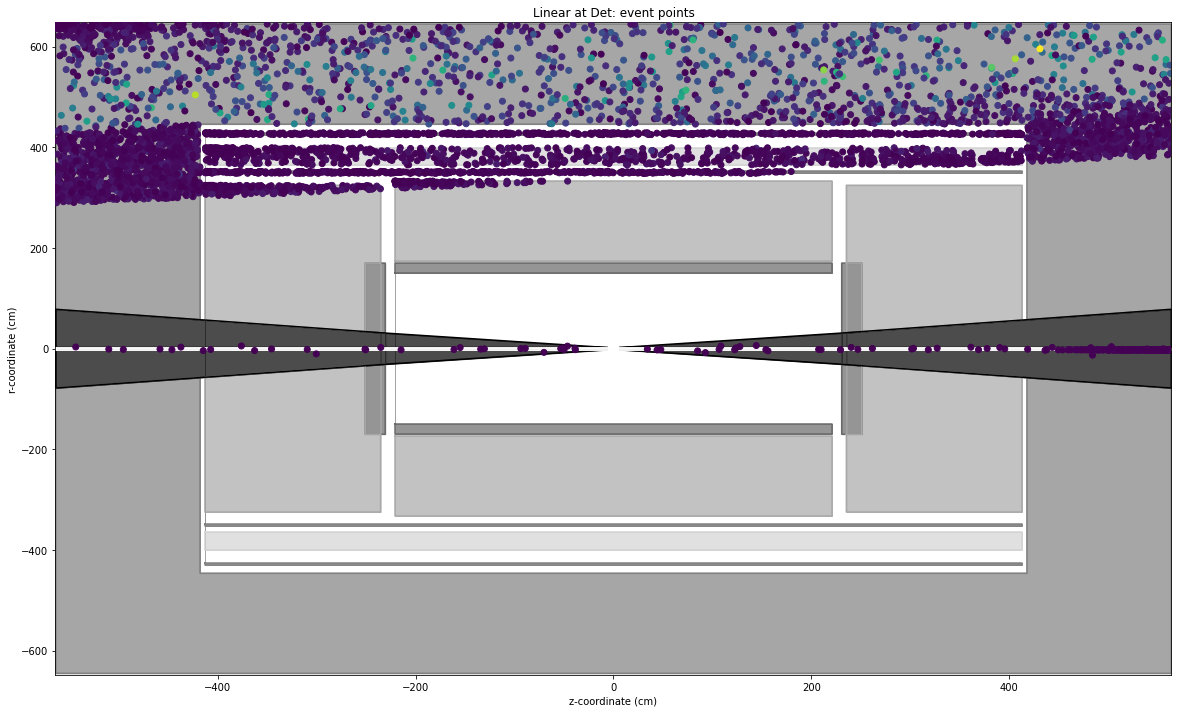

In [25]:
detgeo.plot_sim(geom)
plt.xlim(-564, right=564)
plt.ylim(-648, 648)
arr = sim.events_position[sim.mask]
#arr2= sim2.events_position[sim2.mask]
mask = (sim.part_face_counts[sim.mask][:,:] > 0)
#mask2 = (sim.part_face_counts[sim2.mask][:,:] > 0)
plt.scatter(arr[:, :,2][mask], arr[:,:,1][mask], alpha = 1, zorder = 10, c = sim.part_face_counts[sim.mask][:,:][mask])
#plt.scatter(arr2[:, :,2][mask2], arr2[:,:,1][mask2], alpha = 1, zorder = 10, c = sim2.part_face_counts[sim2.mask][:,:][mask2])
plt.title("Linear at Det: event points")
plt.savefig("plots_Luc/det_2/linear_at_det_events.jpg", bbox_inches='tight', dpi=300)

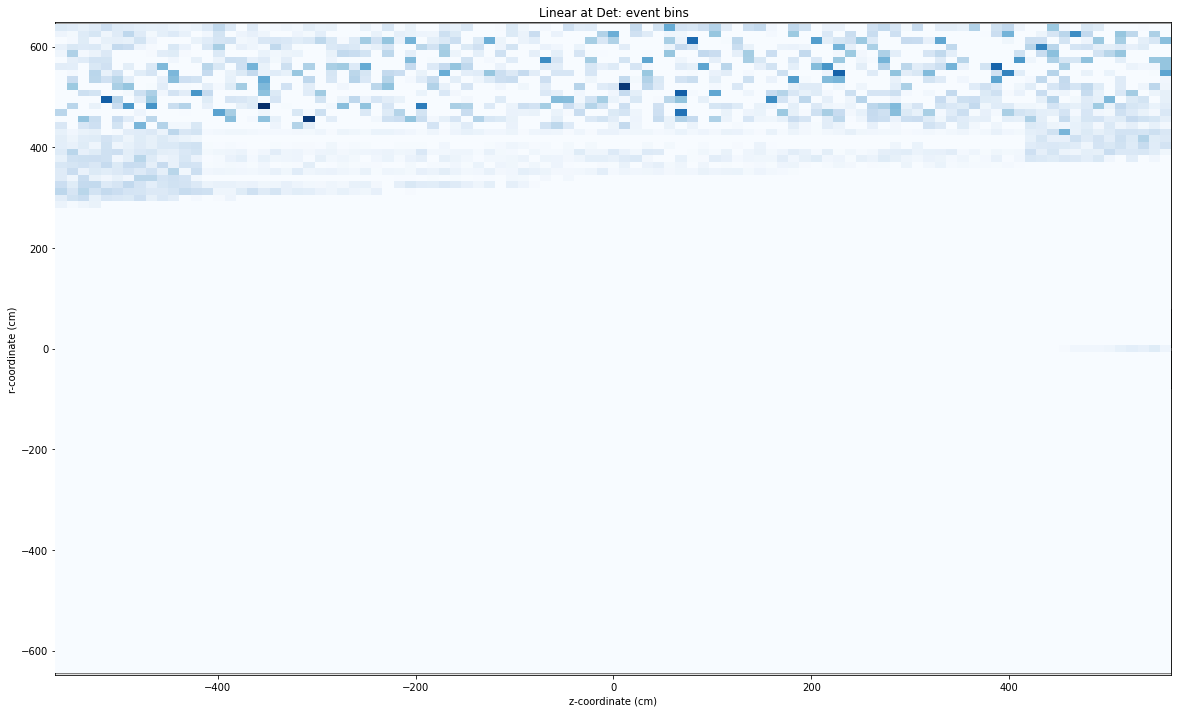

In [27]:
detgeo.plot_sim(geom)
arr = sim.events_position[sim.mask]
#arr2 = sim2.events_position[sim2.mask]

bs = np.linspace(-564, 564, 100)
bs2 = np.linspace(-645, 645, 100)
plt.hist2d(arr[:, :,2][mask].flatten(), arr[:,:,1][mask].flatten(), alpha = 1, zorder = 10, bins = (bs, bs2), weights = sim.part_face_counts[sim.mask][mask].flatten(), cmap ='Blues')
plt.xlim(-564, right=564)
plt.ylim(-648, 648)

plt.title("Linear at Det: event bins")
plt.savefig("plots_Luc/det_2/linear_at_det_events_bins.jpg", bbox_inches='tight', dpi=300)

In [57]:
#limit for when contributions from circle become negligible
d = 645
R = 3e5/2/np.pi
np.sqrt((-d**2 + np.sqrt(d**4 + 4*d**2 * R**2))/2) * 2

11061.49564617769

In [56]:
#limit for 1% error on linear_circular approximation
l = 15000
((2*np.arctan(l * np.sqrt(1 / ((3e5/2/np.pi)**2 - l**2))) * 3e5/2/np.pi) - l*2) / (3e5/2/np.pi) *100

1.0823375896560805

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux import detgeo
from nuflux import data
mdb = data.get_particles("mutristan_small")
cc3 = detgeo.get_quantities(mdb)
_=cc3.straight_segment_at_detector(30000)
detgeo.SimulateDetector(cc3, "approximate_muon_detector_1", "both").run()

3.8e+11 numu events
6.45e+11 nue events


(<nuflux.detgeo.SimulateDetector at 0x7fd2d42ed760>,
 <nuflux.detgeo.SimulateDetector at 0x7fd2b42dd790>)

In [2]:
cc = detgeo.get_quantities(mdb)
_=cc.straight_segment_at_detector(30000)
detgeo.SimulateDetector(cc, "approximate_muon_detector_1", "both").run()

3.7e+11 numu events
6.34e+11 nue events


(<nuflux.detgeo.SimulateDetector at 0x7fe8cc1850a0>,
 <nuflux.detgeo.SimulateDetector at 0x7fe8cdb48c70>)

In [1]:
events_numu =  {0.0001: [1.47e11,1.46e11,1.39e11, 1.46e11, 1.40e11], 0.1:[1.43e11, 1.46e11, 1.46e11, 1.45e11, 1.45e11], 1:[1.43e11, 1.44e11, 1.41e11, 1.48e11, 1.47e11], 10:[1.41e11, 1.46e11, 1.44e11, 1.39e11, 1.43e11], 100:[1.41e11,1.46e11,1.47e11,1.43e11,1.44e11], 1000:[1.43e11, 1.38e11,1.41e11, 1.46e11,1.42e11], 2000:[1.31e11,1.29e11,1.28e11,1.32e11,1.27e11], 4000:[1.28e11,1.27e11,1.31e11, 1.26e11, 1.29e11,1.29e11], 6000:[1.38e11,1.42e11,1.36e11,1.44e11,1.39e11], 8000:[1.37e11,1.45e11,1.41e11,1.42e11,1.47e11], 10000:[1.48e11,1.54e11,1.54e11,1.49e11,1.47e11], 12000:[1.63e11,1.59e11,1.55e11,1.55e11,1.55e11], 14000:[1.81e11,1.83e11,1.87e11,1.78e11,1.84e11],16000:[2.12e11,2.05e11,2.10e11,2.17e11,2.14e11], 18000:[2.42e11,2.38e11,2.31e11,2.32e11,2.39e11], 20000:[2.54e11,2.54e11,2.63e11,2.60e11,2.63e11], 22000:[2.82e11,2.86e11,2.81e11,2.86e11,2.82e11], 24000:[3.08e11,3.09e11,3.04e11,3.11e11,3.11e11], 26000:[3.33e11,3.33e11,3.41e11,3.37e11,3.25e11], 28000:[3.64e11,3.60e11,3.47e11,3.50e11,3.48e11],30000:[3.72e11,3.70e11,3.79e11,3.74e11,3.80e11]} #cm
events_nue  =  {0.0001: [2.46e11,2.48e11, 2.41e11, 2.41e11,2.51e11], 0.1:[2.42e11, 2.46e11, 2.38e11, 2.48e11, 2.53e11], 1:[2.46e11, 2.46e11, 2.43e11, 2.47e11, 2.47e11], 10:[2.44e11, 2.50e11, 2.48e11, 2.47e11, 2.39e11], 100:[2.44e11,2.50e11,2.48e11,2.50e11,2.43e11], 1000:[2.46e11, 2.45e11,2.36e11, 2.46e11,2.47e11], 2000:[2.21e11,2.18e11,2.17e11,2.25e11,2.16e11], 4000:[2.17e11,2.15e11,2.25e11, 2.15e11, 2.17e11,2.24e11], 6000:[2.33e11,2.49e11,2.37e11,2.46e11,2.33e11], 8000:[2.39e11,2.45e11,2.38e11,2.41e11,2.40e11], 10000:[2.53e11,2.51e11,2.48e11,2.51e11,2.49e11], 12000:[2.64e11,2.68e11,2.65e11,2.69e11,2.51e11], 14000:[3.15e11,3.02e11,3.09e11,3.09e11,3.18e11],16000:[3.55e11,3.52e11,3.64e11,3.77e11,3.68e11], 18000:[4.18e11,4.10e11,4.10e11,4.00e11,4.15e11], 20000:[4.51e11,4.39e11,4.58e11,4.46e11,4.43e11], 22000:[4.87e11,4.79e11,4.83e11,4.83e11,4.88e11], 24000:[5.25e11,5.22e11,5.26e11,5.29e11,5.34e11], 26000:[5.67e11,5.72e11,5.78e11,5.69e11,5.51e11], 28000:[6.18e11,6.10e11,5.88e11,5.96e11,5.95e11],30000:[6.33e11,6.34e11,6.56e11,6.49e11,6.45e11]} #cm


In [20]:
import numpy as np
points_numu = []
sds_numu = []
points_nue = []
sds_nue = []

In [21]:
for key in events_numu.keys():
    
    points_numu.append(np.mean(events_numu[key]))
    sds_numu.append(np.std(events_numu[key]))
    points_nue.append(np.mean(events_nue[key]))
    sds_nue.append(np.std(events_nue[key]))

In [22]:
print(len(points_numu))

21


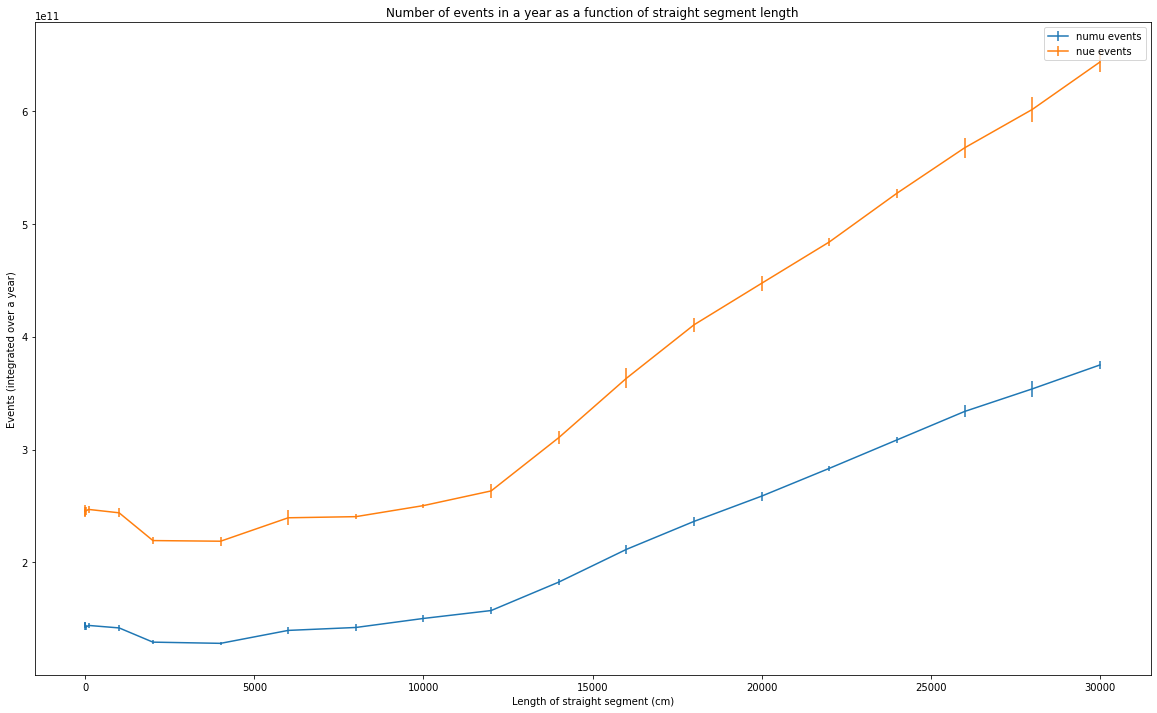

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
lengths = [0.0001, 0.1, 1, 10, 100, 1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000]
plt.errorbar(lengths, points_numu, sds_numu, label= 'numu events')
plt.errorbar(lengths, points_nue, sds_nue, label = 'nue events')
plt.xlabel("Length of straight segment (cm)")
plt.ylabel('Events (integrated over a year)')
plt.title("Number of events in a year as a function of straight segment length")
plt.legend()
plt.savefig("plots_Luc/events_as_a_function_of_ssl.jpg", bbox_inches='tight', dpi=300)